# Data606- PaperCraft Project Dataset Exploration

## Import Libraries

In [182]:
import requests
import csv
import xml.etree.ElementTree as ET
import uuid
import numpy as np
from time import sleep
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Dataset Preparation (Scraping)

In [136]:
def get_data(keyword, category, sortby, sort_order, max_results, start):

    url = f"http://export.arxiv.org/api/query?search_query=cat:{category}&max_results={max_results}&sort_by={sortby}&sort_order{sort_order}&start={start}"

    response = requests.get(url)

    root = ET.fromstring(response.content)
    data = []
    for entry in root.findall('{http://www.w3.org/2005/Atom}entry'):
        title = entry.find('{http://www.w3.org/2005/Atom}title').text
        summary = entry.find('{http://www.w3.org/2005/Atom}summary').text
        author = entry.find('{http://www.w3.org/2005/Atom}author/{http://www.w3.org/2005/Atom}name').text
        published = entry.find('{http://www.w3.org/2005/Atom}published').text
        link = entry.find('{http://www.w3.org/2005/Atom}link[@type="text/html"]')
        if link is not None:
            link = link.attrib['href']

        data.append([uuid.uuid4(), title, summary, author, published, link])
    return data

## Import Dataset

In [167]:
df=pd.read_csv('papers_data2.csv')
df = df[['id', 'Title', 'Summary', 'Authors', 'Published', 'Link']]

In [168]:
df.columns

Index(['id', 'Title', 'Summary', 'Authors', 'Published', 'Link'], dtype='object')

## Dataset Size

In [169]:
df.shape

(9500, 6)

In [170]:
df.columns

Index(['id', 'Title', 'Summary', 'Authors', 'Published', 'Link'], dtype='object')

In [171]:
df['Title']

0       A Market-Oriented Programming Environment and ...
1                 An Empirical Analysis of Search in GSAT
2       The Difficulties of Learning Logic Programs wi...
3       Software Agents: Completing Patterns and Const...
4       Decidable Reasoning in Terminological Knowledg...
                              ...                        
9495    Vision-Based Navigation III: Pose and Motion f...
9496                                     K-Implementation
9497    A Personalized System for Conversational Recom...
9498                  Can We Learn to Beat the Best Stock
9499    A case of combination of evidence in the Demps...
Name: Title, Length: 9500, dtype: object

## Dataset Information

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         9500 non-null   object
 1   Title      9500 non-null   object
 2   Summary    9500 non-null   object
 3   Authors    9500 non-null   object
 4   Published  9500 non-null   object
 5   Link       9500 non-null   object
dtypes: object(6)
memory usage: 445.4+ KB


## Sample Values

In [173]:
df.head()

,id,Title,Summary,Authors,Published,Link
0,774373a4-8aa1-49ae-9707-4a20a6c3558d,A Market-Oriented Programming Environment and ...,Market price systems constitute a well-under...,M. P. Wellman,1993-08-01T00:00:00Z,http://arxiv.org/abs/cs/9308102v1
1,3aa3b1eb-6219-4f6a-8025-9708e1c3cba5,An Empirical Analysis of Search in GSAT,We describe an extensive study of search in ...,I. P. Gent,1993-09-01T00:00:00Z,http://arxiv.org/abs/cs/9309101v1
2,e0a52b84-b04e-413c-8f4e-ef13b190be7a,The Difficulties of Learning Logic Programs wi...,As real logic programmers normally use cut (...,F. Bergadano,1993-11-01T00:00:00Z,http://arxiv.org/abs/cs/9311101v1
3,0cece879-3e29-4faf-90e5-2e2c9b19aad0,Software Agents: Completing Patterns and Const...,To support the goal of allowing users to rec...,J. C. Schlimmer,1993-11-01T00:00:00Z,http://arxiv.org/abs/cs/9311102v1
4,aa9305bb-b2db-49c3-9cdb-904741f57596,Decidable Reasoning in Terminological Knowledg...,Terminological knowledge representation syst...,M. Buchheit,1993-12-01T00:00:00Z,http://arxiv.org/abs/cs/9312101v1


## Preprocessing

### Summary Statistics

In [174]:
df.describe(include='object')

,id,Title,Summary,Authors,Published,Link
count,9500,9500,9500,9500,9500,9500
unique,9500,9479,9492,6519,9401,9500
top,774373a4-8aa1-49ae-9707-4a20a6c3558d,Ordinal Monte Carlo Tree Search,Markov decision processes (MDPs) are widely ...,Joseph Y. Halpern,2012-02-14T16:41:17Z,http://arxiv.org/abs/cs/9308102v1
freq,1,2,2,43,25,1


### Handling Missing Data/Null Values

In [175]:
df.isna().sum()

id           0
Title        0
Summary      0
Authors      0
Published    0
Link         0
dtype: int64

In [176]:
df.nunique()

id           9500
Title        9479
Summary      9492
Authors      6519
Published    9401
Link         9500
dtype: int64

### Exploring Title length for different papers

In [189]:
Title_lengths = df['Title'].str.len()

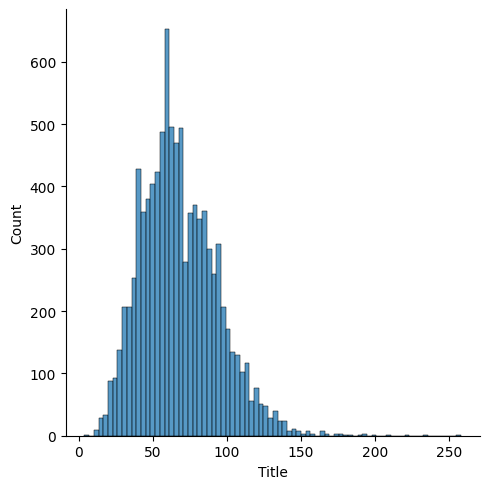

In [190]:
sns.displot(Title_lengths)

In [186]:
Summary_lengths = df['Summary'].str.len()

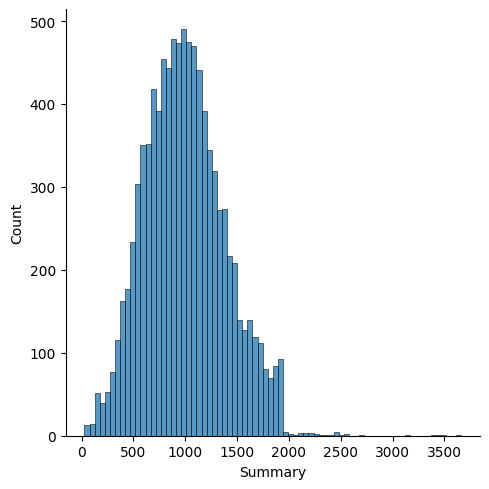

In [187]:
sns.displot(Summary_lengths)

### Stopwords analysis

In [191]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)

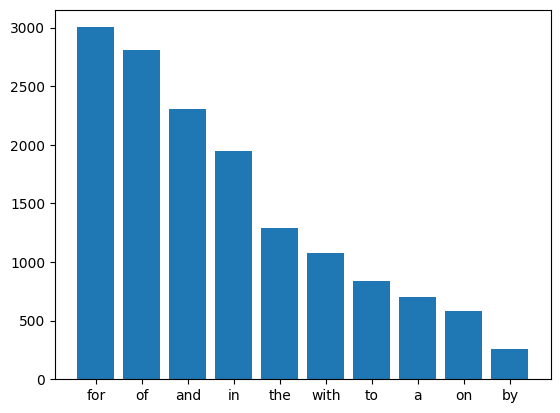

In [193]:
plot_top_stopwords_barchart(df['Title'])

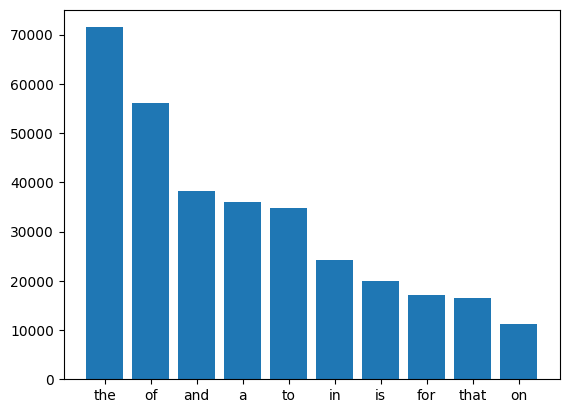

In [194]:
plot_top_stopwords_barchart(df['Summary'])


In [195]:

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)

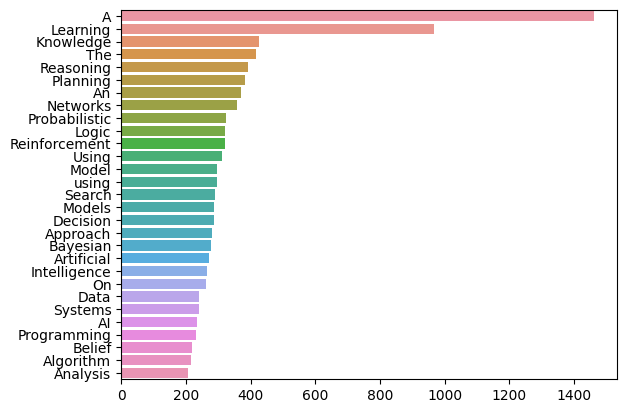

In [196]:
plot_top_non_stopwords_barchart(df['Title'])

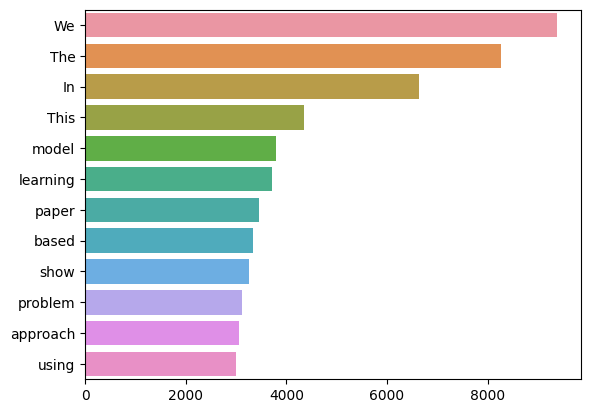

In [198]:
plot_top_non_stopwords_barchart(df['Summary'])